# Part 1: Data Exploration and Visualization (Getting to know your data)

## Setup of our Notebook

In [8]:
#Imports
import pandas as pd
import urllib
import urllib.request
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [9]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
#Function to load data
def data_loader():
    path_url = 'https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv'
    return pd.read_csv(path_url)

data = data_loader()
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [11]:
# Display a concise summary of the DataFrame, non-null entries, data types, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

This table gives us a quick overview of the dataset's structure, including the presence of any missing values, the types of data we are dealing with, and how much memory it occupies. This information is crucial for guiding further data analysis steps.

In [12]:
# Generate descriptive statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, min, and max values.
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


This summary provides a good snapshot of the dataset’s structure, helping us understand the central tendencies and variability in the data.

In [13]:
# This helps us understand the size of the dataset.
data.shape

(129880, 25)

This summary says we have 129,880 rows and 25 Columns (Features)

In [14]:
# Get unique values for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f'{col}:', data[col].unique())

Gender: ['Male' 'Female']
Customer Type: ['First-time' 'Returning']
Type of Travel: ['Business' 'Personal']
Class: ['Business' 'Economy' 'Economy Plus']
Satisfaction: ['Neutral or Dissatisfied' 'Satisfied']


In [15]:
# Map the 'Satisfaction' column from strings to numerical values (binary encoding)
satisfaction_mapping = {
    'Neutral or Dissatisfied': 0,
    'Satisfied': 1
}

# Apply the mapping to the 'Satisfaction' column in the original DataFrame and save the result in datacopy_1
datacopy_1 = data.copy(deep=True)
datacopy_1['Satisfaction'] = datacopy_1['Satisfaction'].replace(satisfaction_mapping)

# Check the first few rows of datacopy_1 to ensure the changes were applied
datacopy_1.head()


<ipython-input-15-9334fa911782>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datacopy_1['Satisfaction'] = datacopy_1['Satisfaction'].replace(satisfaction_mapping)


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,0,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,1,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,1,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,1,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,1,4


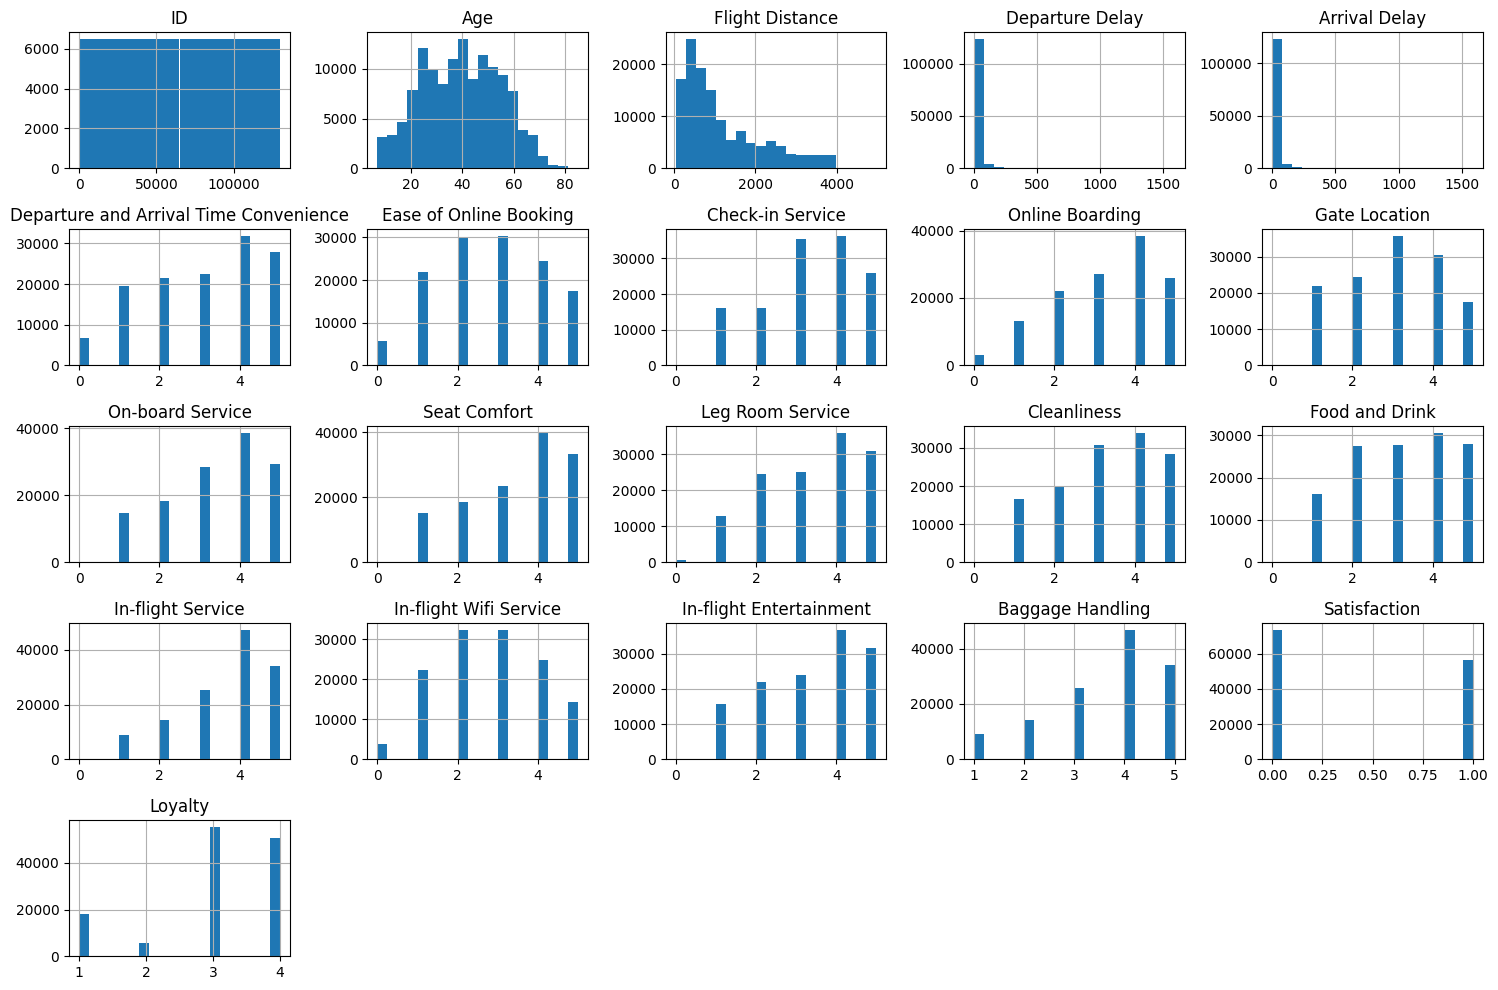

In [16]:
# Plot histogram for numerical columns
datacopy_1.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Cleaning our Data

In [17]:
# Drop the ID column
datacopy_2 = datacopy_1.drop('ID', axis=1)

# Check the first few rows to confirm it's removed
print(datacopy_2.head())

   Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  Seat Comfort  Leg Room Service  Cleanliness  \
0            

In [18]:
print(datacopy_2.isnull().sum())

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

We have 393 null in Arrival Delay, also important to note that As the data description states, all the survey's features with null values was recorded as 0, so we have to replace them with nulls and try to impute them.

In [19]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Step 1: Create a deep copy of the original dataset
datacopy_3 = datacopy_2.copy(deep=True)

# Step 2: Replace 0 with NaN for all columns except 'Satisfaction'
columns_to_replace = datacopy_3.drop(['Satisfaction'], axis=1).columns
datacopy_1[columns_to_replace] = datacopy_1[columns_to_replace].replace(0, np.nan)

# Step 3: Initialize datacopy_4 as a deep copy of datacopy_3
datacopy_4 = datacopy_3.copy(deep=True)

# Step 4: Initialize the SimpleImputer with the 'median' strategy
imputer = SimpleImputer(strategy='median')

# Step 5: Drop categorical columns and 'Satisfaction' from imputation
columns_to_impute = datacopy_4.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], axis=1)

# Apply the imputer
mid_filled = imputer.fit_transform(columns_to_impute)

# Convert mid_filled to DataFrame with matching column names
mid_filled = pd.DataFrame(mid_filled, columns=columns_to_impute.columns)

# Step 6: Update datacopy_2 with the imputed values in the relevant columns
datacopy_4.update(mid_filled)

# Step 7: Ensure Satisfaction's 0 values are kept as "Dissatisfied"
datacopy_4['Satisfaction'] = datacopy_3['Satisfaction']

# Step 8: Check for any remaining missing values in datacopy_2
print(datacopy_4.isnull().sum())

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

### Dealing with Outliers

We identified three columns—Flight Distance, Departure Delay, and Arrival Delay—that are likely to contain outliers, so we will focus on examining these.

<ipython-input-20-fc97696d3595>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, y='Satisfaction', x='Flight Distance', palette='Set2', alpha=0.2)


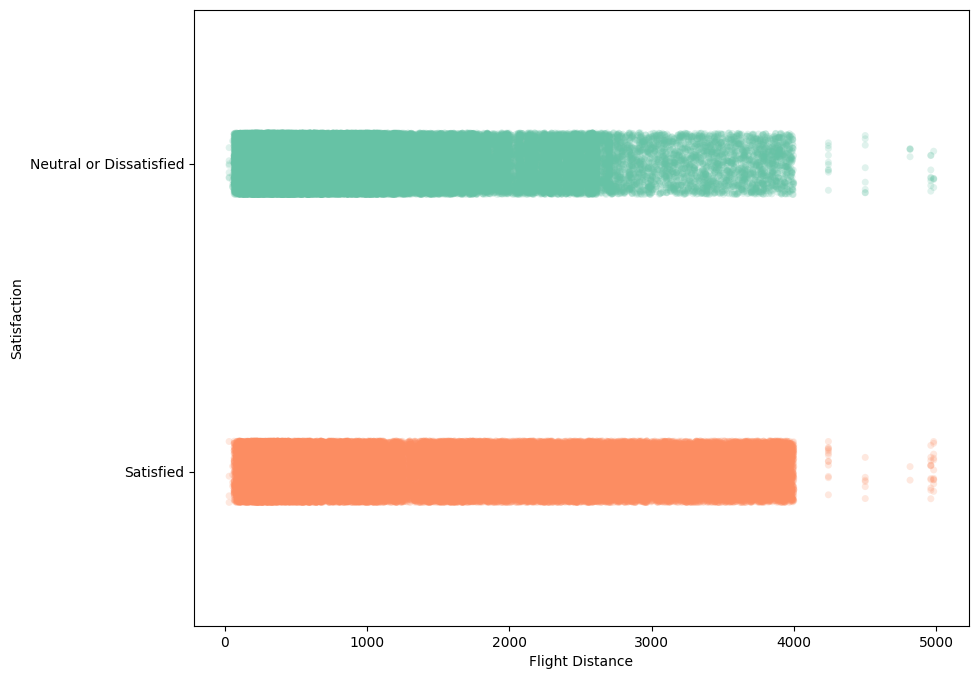

In [20]:
# Set the figure size for the plot (increased slightly for better visibility)
plt.figure(figsize=(10, 8))

# Create a strip plot to analyze the relationship between Flight Distance and Satisfaction levels
sns.stripplot(data=data, y='Satisfaction', x='Flight Distance', palette='Set2', alpha=0.2)

# Render the plot
plt.show()

Flight Distance Looks Normal

<ipython-input-21-1b7066edb7ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, y='Satisfaction', x='Departure Delay', palette='Set3', alpha=0.3)


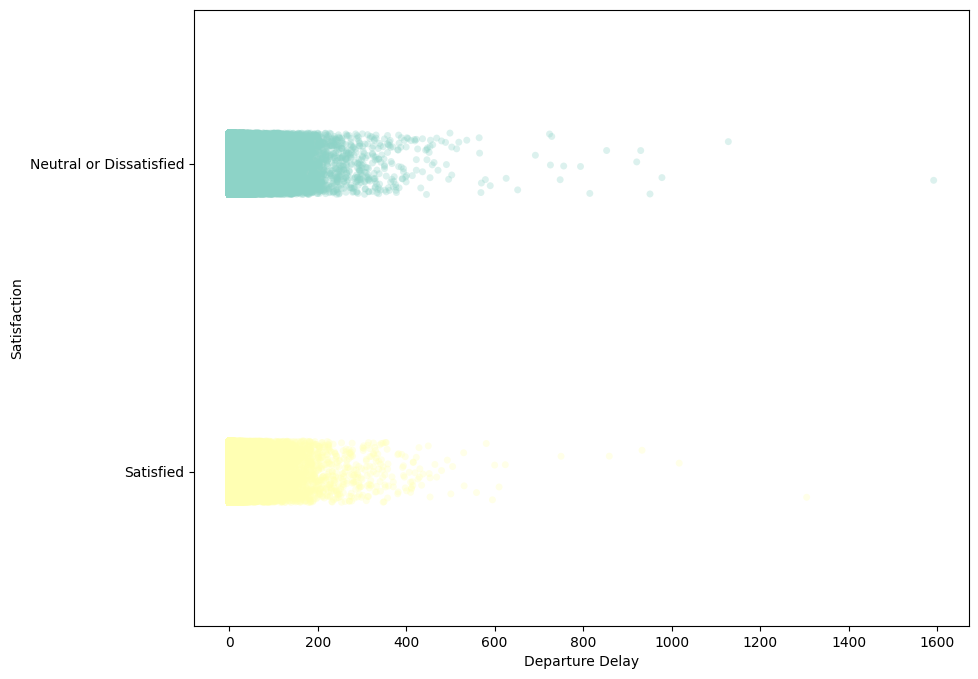

In [21]:
# Set the figure size slightly larger to improve readability
plt.figure(figsize=(10, 8))

# Create a strip plot to examine the relationship between Departure Delay and Satisfaction
# A different color palette 'Set3' is used for variety, and alpha=0.3 increases transparency to reduce overlap in dense areas
sns.stripplot(data=data, y='Satisfaction', x='Departure Delay', palette='Set3', alpha=0.3)

# Display the plot
plt.show()

Although we cannot automatically classify the distant data points as outliers since they represent actual recorded values, eliminating some of them could enhance the efficiency of our modeling. Therefore, we will remove observations where the value exceeds 900.

In [22]:
# Set a new threshold for removing observations
threshold_value = 900

In [23]:
# Create a deep copy of the dataset
datacopy_5 = datacopy_4.copy(deep=True)

# Remove observations where the Departure Delay exceeds 800
datacopy_5.drop(datacopy_5[datacopy_5['Departure Delay'] > threshold_value].index, inplace=True)

<ipython-input-24-d40a634f2dc9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, y='Satisfaction', x='Arrival Delay', palette='Set2', alpha=0.3)


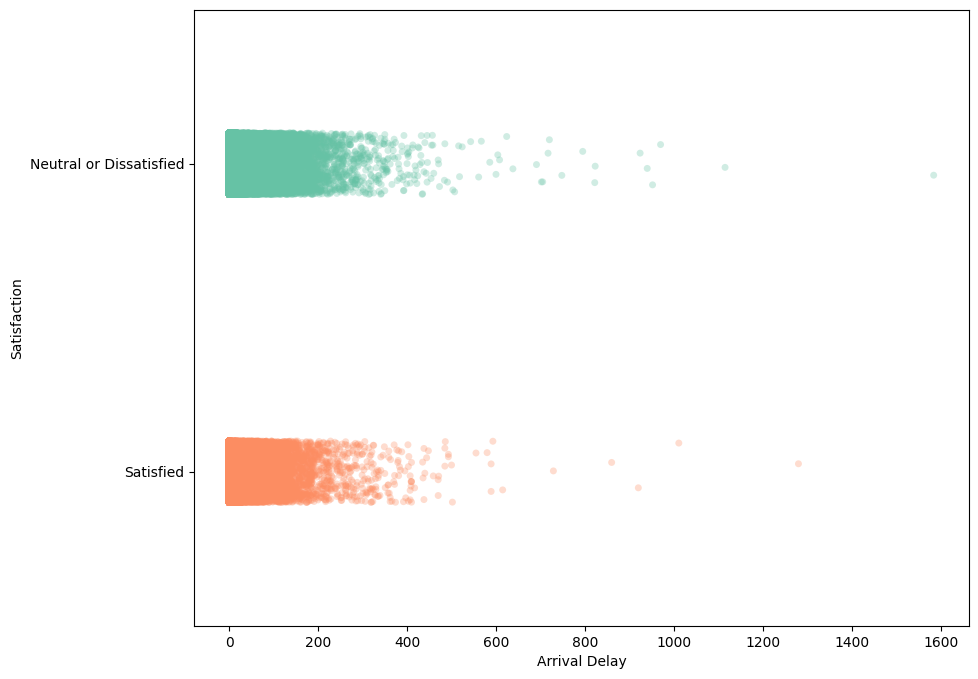

In [24]:
# Set the figure size slightly larger for better visualization
plt.figure(figsize=(10, 8))

# Create a strip plot to visualize the relationship between Arrival Delay and Satisfaction
# Using a different color palette 'Set2' for variety, and increasing transparency to 0.3 for better visibility of overlapping points
sns.stripplot(data=data, y='Satisfaction', x='Arrival Delay', palette='Set2', alpha=0.3)

# Display the plot
plt.show()

The same situation happen here as Departure colmun, so we will drop observations > 800 too.

In [25]:
# Remove observations where the Arrival Delay exceeds 800
datacopy_5.drop(datacopy_5[datacopy_5['Arrival Delay'] > threshold_value].index, inplace=True)

# Visualizing Our Data

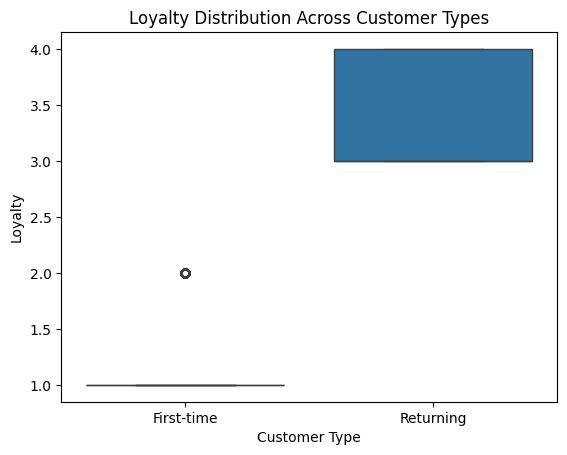

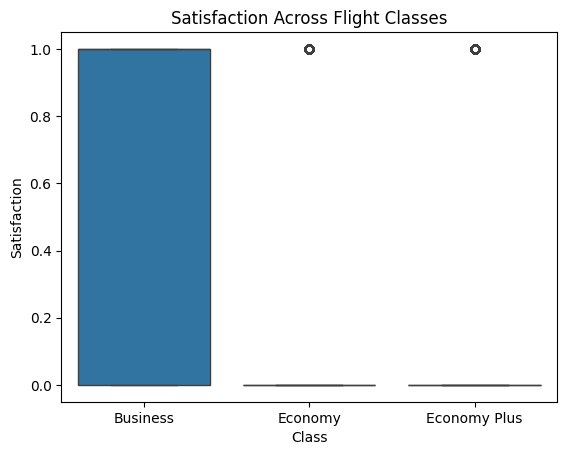

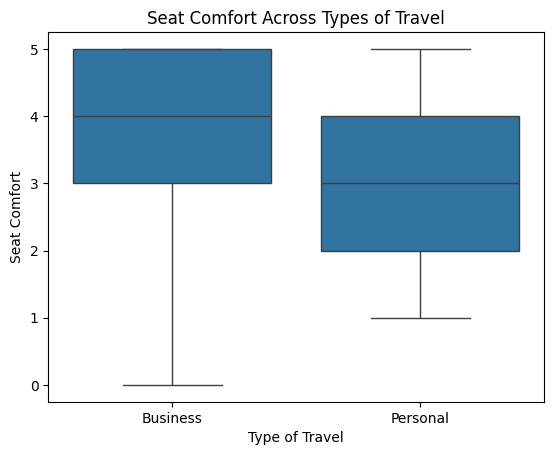

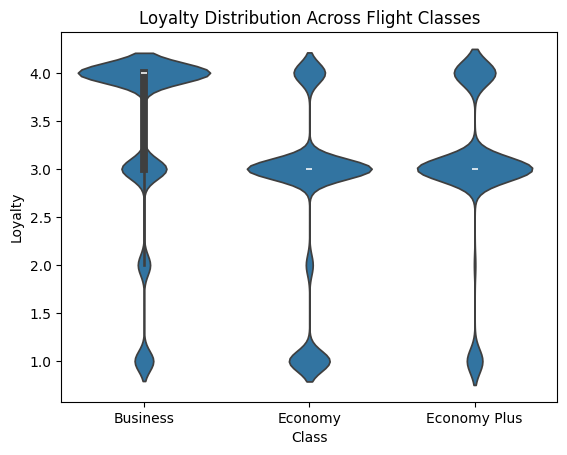

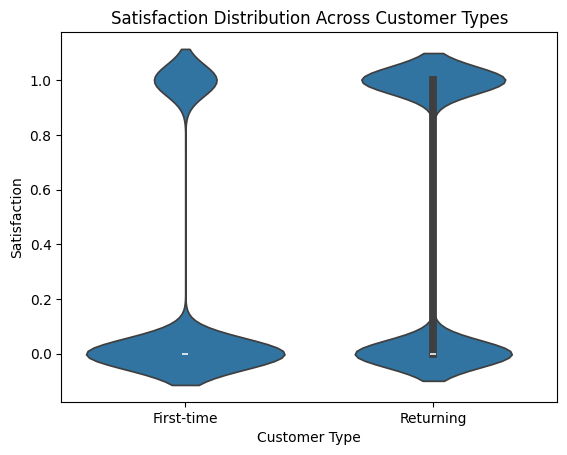

ValueError: could not convert string to float: 'Male'

<Figure size 1200x800 with 0 Axes>

In [26]:
# Boxplot to visualize the distribution of Loyalty across different Customer Types
sns.boxplot(x='Customer Type', y='Loyalty', data=datacopy_5)
plt.title('Loyalty Distribution Across Customer Types')
plt.show()

# Boxplot to visualize the Satisfaction levels across different Flight Classes
sns.boxplot(x='Class', y='Satisfaction', data=datacopy_5)
plt.title('Satisfaction Across Flight Classes')
plt.show()

# Boxplot to show Seat Comfort ratings across different Types of Travel
sns.boxplot(x='Type of Travel', y='Seat Comfort', data=datacopy_5)
plt.title('Seat Comfort Across Types of Travel')
plt.show()

# Violin plot to visualize the distribution of Loyalty across Flight Classes
sns.violinplot(x='Class', y='Loyalty', data=datacopy_5)
plt.title('Loyalty Distribution Across Flight Classes')
plt.show()

# Violin plot to visualize the distribution of Satisfaction across Customer Types
sns.violinplot(x='Customer Type', y='Satisfaction', data=datacopy_5)
plt.title('Satisfaction Distribution Across Customer Types')
plt.show()

# Correlation matrix heatmap to visualize relationships between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Top-Level Summary of All the Visuals with Important and Interesting Points

## 1. Loyalty Distribution Across Customer Types (Box Plot)
- **Observation**: Returning customers exhibit significantly higher loyalty compared to first-time customers, as shown by a higher median loyalty score for returning customers.
- **Key Insight**: Customer loyalty programs or incentives seem to have a strong positive effect on returning customers, which highlights the importance of maintaining long-term customer relationships.

## 2. Satisfaction Across Flight Classes (Box Plot)
- **Observation**: Business class passengers report much higher satisfaction than passengers in Economy or Economy Plus classes.
- **Key Insight**: There is a clear correlation between flight class and satisfaction, with premium service offerings in Business class resulting in higher satisfaction levels. This highlights the importance of service quality on customer satisfaction.

## 3. Seat Comfort Across Types of Travel (Box Plot)
- **Observation**: Seat comfort ratings are generally higher for business travelers compared to personal travelers. There’s also greater variability in the comfort experiences of personal travelers.
- **Key Insight**: Business travelers may have higher expectations or access to better seating arrangements, while personal travelers might experience more inconsistent seating conditions.

## 4. Loyalty and Satisfaction Distribution Across Flight Classes and Customer Types (Violin Plots)
- **Observation**: Violin plots reveal the full distribution of loyalty and satisfaction scores, showing multiple peaks. For instance, Business class passengers tend to cluster around higher loyalty scores, while Economy and Economy Plus classes have more distributed loyalty scores.
- **Key Insight**: Loyalty and satisfaction are heavily influenced by flight class. The shapes of the violins indicate some segments of Economy passengers experience higher satisfaction, but the majority lean towards lower scores.

## 5. Correlation Matrix
- **Observation**: Some features show strong correlations. For example, **Departure Delay** and **Arrival Delay** are highly correlated (**0.97**), while **Seat Comfort** and **Leg Room Service** also share a strong positive relationship (**0.68**).
- **Key Insight**: Certain factors such as delays and seat comfort are closely related to other variables and can influence the overall passenger experience. Variables like online booking and gate location have weaker correlations, suggesting that these features have a more limited impact on loyalty and satisfaction.

---


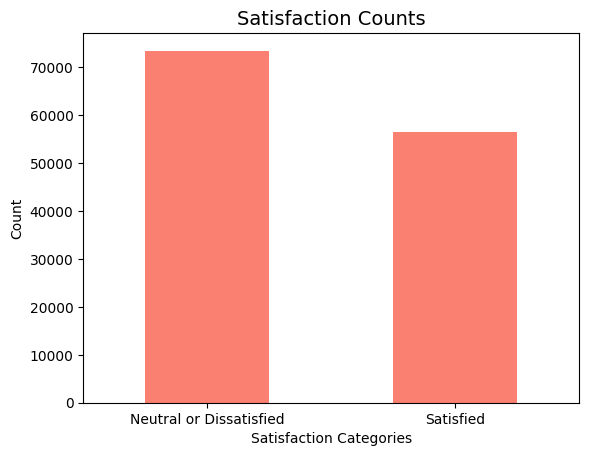

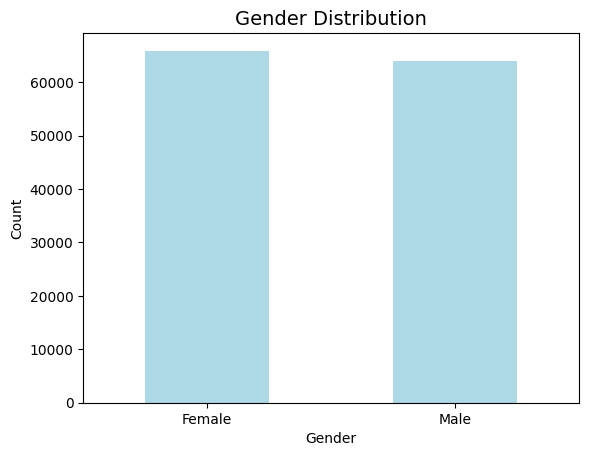

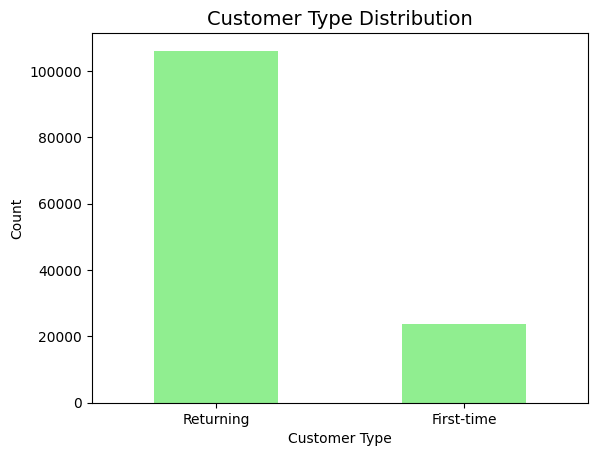

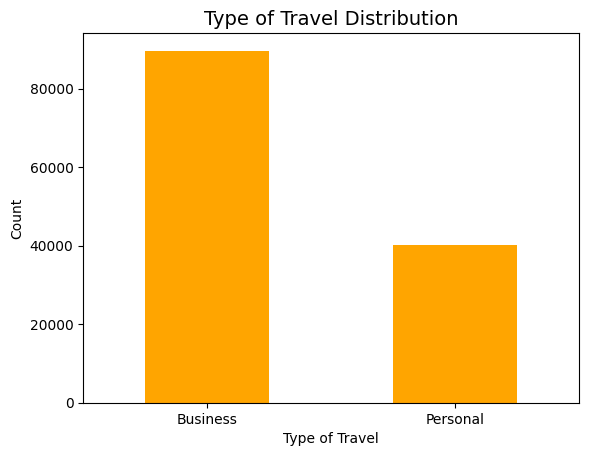

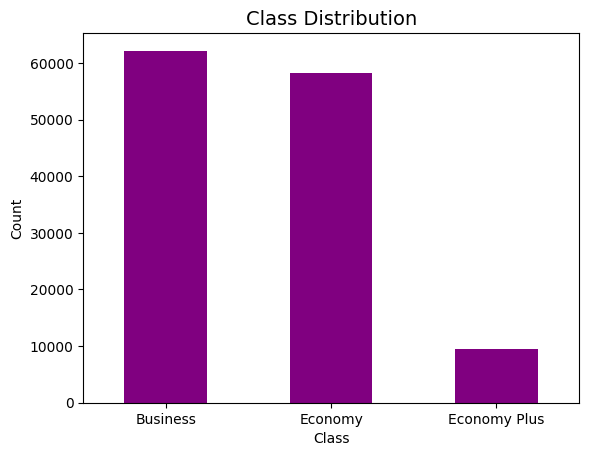

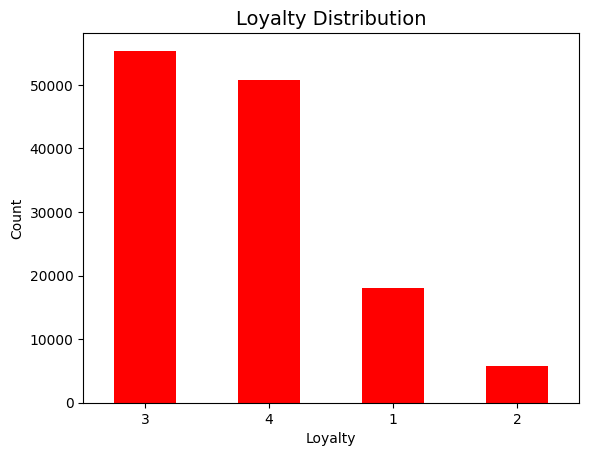

In [27]:
# Bar plot for the 'Satisfaction' column
data['Satisfaction'].value_counts().plot(kind='bar', color='salmon')
plt.title('Satisfaction Counts', fontsize=14)
plt.xlabel('Satisfaction Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Gender' column
data['Gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Customer Type' column
data['Customer Type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Customer Type Distribution', fontsize=14)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Type of Travel' column
data['Type of Travel'].value_counts().plot(kind='bar', color='orange')
plt.title('Type of Travel Distribution', fontsize=14)
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Class' column
data['Class'].value_counts().plot(kind='bar', color='purple')
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Loyalty' column
data['Loyalty'].value_counts().plot(kind='bar', color='red')
plt.title('Loyalty Distribution', fontsize=14)
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Top-Level Summary of the Images

## 1. Type of Travel Distribution
- **Observation**: The majority of passengers are traveling for business purposes, with around 90,000 business travelers compared to approximately 40,000 personal travelers.
- **Key Insight**: Business travelers dominate the dataset, which could imply that travel preferences, satisfaction, and loyalty are largely influenced by business-related factors.

## 2. Class Distribution
- **Observation**: Business and Economy class have a similar distribution of passengers, with both around 60,000 passengers, while Economy Plus is significantly less represented.
- **Key Insight**: The lower representation of Economy Plus may indicate it is a niche category or less accessible compared to the more traditional Business and Economy classes.

## 3. Loyalty Distribution
- **Observation**: Loyalty scores are concentrated around 3 and 4, with very few passengers falling under the lower loyalty categories of 1 and 2.
- **Key Insight**: Most passengers exhibit moderate to high loyalty, suggesting that overall, passengers tend to have positive experiences, but there's room for improvement in pushing more passengers towards the highest loyalty score.

## 4. Satisfaction Counts
- **Observation**: The dataset shows more passengers being **Neutral or Dissatisfied** than **Satisfied**. Around 70,000 passengers fall into the dissatisfied category, while approximately 55,000 are satisfied.
- **Key Insight**: While satisfaction is relatively high, a significant portion of passengers are neutral or dissatisfied, suggesting there are opportunities to improve customer experiences.

## 5. Gender Distribution
- **Observation**: Gender distribution is nearly equal, with a slight male majority. Both genders are represented by around 60,000 passengers each.
- **Key Insight**: The balanced gender distribution suggests that any analysis or customer insights drawn from the data are likely to be representative of both male and female passengers.

## 6. Customer Type Distribution
- **Observation**: **Returning customers** make up the vast majority of the dataset, with around 100,000 passengers, compared to approximately 25,000 **First-time** customers.
- **Key Insight**: The high number of returning customers indicates that many passengers are repeat flyers, which highlights the importance of retaining customers and improving their overall loyalty and satisfaction.



In [29]:
# Select only numerical columns from the DataFrame
numerical_data = datacopy_5.select_dtypes(include=[np.number])

# Now calculate the correlation matrix, focusing only on the numerical columns
corr_matrix = numerical_data.corr()
print(corr_matrix)

                                             Age  Flight Distance  \
Age                                     1.000000         0.099458   
Flight Distance                         0.099458         1.000000   
Departure Delay                        -0.009173         0.001391   
Arrival Delay                          -0.011404        -0.003092   
Departure and Arrival Time Convenience  0.036983        -0.018918   
Ease of Online Booking                  0.022548         0.065169   
Check-in Service                        0.033443         0.073610   
Online Boarding                         0.207550         0.214836   
Gate Location                          -0.000416         0.005521   
On-board Service                        0.057073         0.111186   
Seat Comfort                            0.159115         0.157674   
Leg Room Service                        0.039119         0.134526   
Cleanliness                             0.052536         0.095650   
Food and Drink                    

In [39]:
# Select only numerical columns from the DataFrame
numerical_data = datacopy_5.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Sort and print the correlation of all attributes with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"].sort_values(ascending=False)
print(loyalty_correlations)

# Output the most correlated attributes with 'Loyalty'
# This will show you the attributes most positively and negatively correlated with 'Loyalty'

Loyalty                                   1.000000
Satisfaction                              0.643886
Online Boarding                           0.397663
Flight Distance                           0.324743
Seat Comfort                              0.295768
Age                                       0.288218
In-flight Entertainment                   0.281302
Cleanliness                               0.216550
On-board Service                          0.202984
Leg Room Service                          0.192394
Food and Drink                            0.149836
In-flight Wifi Service                    0.145955
Check-in Service                          0.142739
Departure and Arrival Time Convenience    0.134025
Baggage Handling                          0.104736
In-flight Service                         0.104080
Ease of Online Booking                    0.098352
Gate Location                            -0.004872
Departure Delay                          -0.029324
Arrival Delay                  

In [40]:
# Calculate the correlation matrix for the dataset stored in datacopy_5
# This will help identify the relationships between numerical variables in the dataset
correlation_matrix = datacopy_5.corr()

# Display the correlation matrix for further analysis
correlation_matrix


ValueError: could not convert string to float: 'Male'

In [ ]:
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(12, 10))

# Plotting the heatmap with better settings for readability
sns.heatmap(correlation_matrix,
            square=True,
            cmap='BuPu',
            annot=True,
            linewidths=0.5,
            fmt='.2f',   # Limit the decimal places in annotations to 2
            cbar_kws={'shrink': 0.8},  # Shrink color bar for better fit
            annot_kws={"size": 8})    # Adjust annotation size

# Set the title and rotate the labels for readability
plt.title('Correlation Heatmap', size=15)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels and adjust font size
plt.yticks(rotation=0, fontsize=10)  # Keep y labels horizontal and adjust font size
plt.show()


The correlation heatmap highlights several interesting relationships between features in the dataset. One of the strongest correlations is observed between Departure Delay and Arrival Delay, with a correlation coefficient of 0.96, indicating that when there is a departure delay, it is highly likely to result in an arrival delay. Additionally, there is a notable positive correlation between Seat Comfort and Leg Room Service (0.68), suggesting that passengers who rate their seat comfort highly tend to also rate legroom favorably. On the other hand, Age and Loyalty have a weaker correlation (0.29), showing that age has a modest impact on passenger loyalty. Overall, the heatmap reveals which features are most strongly related, which can help identify important factors for further analysis.

In [ ]:
# Filter the correlation matrix to display only pairs with correlation greater than 0.5
# while keeping only the upper triangle to avoid duplicate pairs
filtered_corr = correlation_matrix.where(np.triu(correlation_matrix > 0.5, k=1))

# Stack the filtered correlations and sort them in descending order
strong_corr_pairs = filtered_corr.stack().sort_values(ascending=False)

# Display the result to identify the strongest correlations between variables
strong_corr_pairs


The correlations underscore the importance of operational efficiency (e.g., managing delays), service quality (e.g., in-flight services, cleanliness, and comfort), and convenience (e.g., online booking and Wi-Fi) in shaping customer loyalty and satisfaction. These insights can help prioritize improvements in specific areas to enhance the overall passenger experience.

## Let us analze further how flight delays affect satisfaction of cutomers

In [ ]:
# Group the data by the 'Satisfaction' column and calculate the mean 'Arrival Delay' for each satisfaction level
mean_arrival_delay_by_satisfaction = datacopy_5.groupby('Satisfaction')['Arrival Delay'].mean()

# Display the result to understand the average arrival delay for each level of satisfaction
mean_arrival_delay_by_satisfaction


Passengers who are dissatisfied tend to experience longer arrival delays on average compared to satisfied passengers. This suggests that delays play a significant role in reducing passenger satisfaction, and minimizing delays could lead to improved satisfaction levels.

In [ ]:
# Set the figure size and DPI for better quality
plt.figure(figsize=(10, 5), dpi=100)

# Plot a scatterplot to visualize the relationship between Arrival Delay and Departure Delay, colored by Satisfaction
sns.scatterplot(data=datacopy_5, x='Arrival Delay', y='Departure Delay', hue='Satisfaction', palette='coolwarm', alpha=0.8)

# Display the plot
plt.title('Scatterplot of Arrival vs Departure Delays by Satisfaction')
plt.show()

This plot confirms that minimizing delays is crucial to improving passenger satisfaction, as longer delays are strongly associated with dissatisfaction.

In [ ]:
# Set the figure size and DPI for better quality
plt.figure(figsize=(10, 5), dpi=100)

# Plot a scatterplot to visualize the relationship between Flight Distance and Departure Delay, colored by Satisfaction
sns.scatterplot(data=datacopy_5, x='Flight Distance', y='Departure Delay', hue='Satisfaction', palette='coolwarm', alpha=0.8)

# Set the limit for the y-axis to cap at 1000 for better visualization
plt.ylim(0, 1000)

# Display the plot
plt.title('Scatterplot of Flight Distance vs Departure Delay by Satisfaction')
plt.show()



The main takeaway from this plot is that passengers on longer flights tend to be more accepting of slight delays, which suggests that delays have less of an impact on their satisfaction. In contrast, short-distance travelers appear to be more sensitive to departure delays, which could negatively impact their experience. Interestingly, despite the delays, there is still a mix of satisfied and dissatisfied passengers across both short and long flights. This indicates that other factors, like in-flight service or seating comfort, could be playing a key role in maintaining satisfaction even when delays occur. Therefore, while minimizing delays is important, enhancing the overall travel experience is equally critical, particularly for shorter flights.

In [ ]:
# Calculate the mean satisfaction for each class for further analysis
mean_satisfaction_by_class = datacopy_5.groupby('Class')['Satisfaction'].mean()

# Display the mean satisfaction by flight class
print(mean_satisfaction_by_class)

The results show that Business class passengers have a significantly higher average satisfaction score (0.69) compared to Economy (0.19) and Economy Plus (0.25). This indicates that passengers flying in Business class are generally much more satisfied with their experience, while Economy and Economy Plus passengers tend to report lower satisfaction levels. This disparity could be attributed to the enhanced services, comfort, and amenities typically offered in Business class compared to the other classes.

In [ ]:
# Group the data by 'Class' and calculate the mean for each class across all numerical columns
class_means = datacopy_5.groupby('Class').mean()

# Display the result to analyze the average values for each class
class_means

The results show that Business class passengers are significantly more satisfied due to better service, comfort, and amenities. Economy and Economy Plus passengers report lower satisfaction, particularly in areas like seat comfort and service quality. Addressing these aspects in lower classes could help improve overall passenger satisfaction and loyalty.

In [ ]:
# Select more numerical attributes based on your analysis
attributes = [
    "Loyalty",
    "Satisfaction",
    "Online Boarding",
    "Seat Comfort",
    "Class",
    "Arrival Delay",
    "Departure Delay",
    "In-flight Entertainment",
    "Food and Drink",
    "In-flight Wifi Service",
    "Check-in Service",
    "On-board Service"
]

# Calculate the correlation matrix for the selected attributes
corr_matrix = datacopy_5[attributes].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Loyalty, Satisfaction, and Various Flight Attributes')
plt.show()

This heatmap shows the correlations between **Loyalty**, **Satisfaction**, and various flight attributes:

- **Loyalty and Satisfaction**: There is a **strong positive correlation** of **0.64** between **Loyalty** and **Satisfaction**, indicating that satisfied passengers are more likely to be loyal.
  
- **Satisfaction and Online Boarding**: **Satisfaction** has a significant correlation of **0.50** with **Online Boarding**, suggesting that ease and convenience during boarding play a role in overall satisfaction.

- **Seat Comfort and Satisfaction**: **Seat Comfort** is correlated with **Satisfaction** at **0.35**, meaning that better seating contributes positively to passenger satisfaction.

- **Arrival Delay and Departure Delay**: These two metrics have the strongest correlation of **0.96**, reflecting that longer departure delays almost always lead to longer arrival delays. However, both have a very low correlation with **Satisfaction**, showing that delays, while frustrating, are not the biggest drivers of dissatisfaction.

- **In-flight Services**: **In-flight Entertainment** (0.62) and **Food and Drink** (0.62) are strongly correlated with one another, indicating that passengers often rate these services similarly. However, their correlation with **Satisfaction** is moderate, suggesting that while important, these services alone are not the main drivers of satisfaction.

### Conclusion:
The strongest drivers of **Satisfaction** appear to be **Online Boarding**, **Seat Comfort**, and **In-flight Services**. The high correlation between **Loyalty** and **Satisfaction** emphasizes the importance of focusing on overall satisfaction to retain loyal passengers. Improving these key service areas may lead to increased satisfaction and, consequently, higher loyalty.


## Experimenting with Attribute Combinations

In [ ]:
# New Feature 1: Service Quality Score (sum of key service aspects)
datacopy_5['service_quality_score'] = (
    datacopy_5['Check-in Service'] +
    datacopy_5['Online Boarding'] +
    datacopy_5['On-board Service'] +
    datacopy_5['Seat Comfort'] +
    datacopy_5['In-flight Entertainment'] +
    datacopy_5['Cleanliness']
)

# New Feature 2: Delay Impact Score (combines departure and arrival delays)
datacopy_5['delay_impact_score'] = (
    datacopy_5['Departure Delay'] + datacopy_5['Arrival Delay'].fillna(0)  # Handling missing arrival delays
)

# New Feature 3: Comfort vs. Duration Ratio (Seat Comfort relative to Flight Distance)
datacopy_5['comfort_vs_duration'] = datacopy_5['Seat Comfort'] / datacopy_5['Flight Distance']

# New Feature 4: Total In-flight Experience (sum of in-flight services)
datacopy_5['total_inflight_experience'] = (
    datacopy_5['In-flight Wifi Service'] +
    datacopy_5['In-flight Entertainment'] +
    datacopy_5['In-flight Service'] +
    datacopy_5['Food and Drink']
)

# Checking the first few rows of the newly created features
print(datacopy_5[['service_quality_score', 'delay_impact_score', 'comfort_vs_duration', 'total_inflight_experience']].head())

Passengers generally rate the service quality highly across the dataset, which indicates that areas like check-in, seat comfort, and cleanliness are strengths.
Delays are a significant issue for some passengers, and this variability can affect overall satisfaction.
Comfort has a diminishing impact on longer flights, which could suggest that amenities like in-flight entertainment and service become more important as flight distances increase.

In [ ]:
# Recalculate the correlation matrix after adding the new features
corr_matrix = datacopy_5.corr()

# Sort and print the correlations of all attributes with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"].sort_values(ascending=False)
print(loyalty_correlations)


In [41]:
datacopy_5 = pd.get_dummies(datacopy_5, drop_first=True)
# Recalculate the correlation matrix
corr_matrix = datacopy_5.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Customer Type_Returning                   0.871541
Satisfaction                              0.643886
Online Boarding                           0.397663
Flight Distance                           0.324743
Class_Economy                             0.316472
Seat Comfort                              0.295768
Age                                       0.288218
In-flight Entertainment                   0.281302
Cleanliness                               0.216550
On-board Service                          0.202984
Leg Room Service                          0.192394
Food and Drink                            0.149836
In-flight Wifi Service                    0.145955
Check-in Service                          0.142739
Departure and Arrival Time Convenience    0.134025
Baggage Handling                          0.104736
In-flight Service                         0.104080
Ease of Online Booking                    0.098352
Arrival Delay                  

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to numeric using One-Hot Encoding
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# One-Hot Encode categorical columns (you can specify the categorical columns if needed)
X_encoded = pd.get_dummies(X)

# Create a logistic regression estimator
estimator = LogisticRegression(max_iter=10000, solver='saga')

# Perform feature selection using RFE
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_encoded, y)

# Get the selected feature indices and names
selected_feature_indices = selector.support_
selected_feature_names = X_encoded.columns[selected_feature_indices]

print("Selected features:", selected_feature_names)


Overall, satisfaction remains the most influential factor driving passenger loyalty. In addition to satisfaction, service quality and boarding efficiency play significant roles in fostering loyalty. Meanwhile, delays—though having a less pronounced impact—still lead to customer disloyalty and should be addressed to improve retention. Airlines should focus on enhancing service quality and minimizing delays to maintain a loyal customer base.

### Bayesian Learning

In [32]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# List of models to evaluate
models = {
    "Multinomial Naive Bayes": MultinomialNB(alpha=1.0e-10),
    "Gaussian Naive Bayes": GaussianNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Categorical Naive Bayes": CategoricalNB()
}

# Initialize results dictionary
results = []

# Convert categorical variables to numeric using One-Hot Encoding
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# One-Hot Encode categorical columns (you can specify the categorical columns if needed)
X_encoded = pd.get_dummies(X)
# Loop through each model, fit, predict, and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_encoded, y)

    # Make predictions and get probabilities
    y_pred = model.predict(X_encoded)
    y_prob = model.predict_proba(X_encoded)

    # Calculate accuracy, precision, recall, and ROC AUC
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y, y_prob, average='weighted', multi_class='ovr')

    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Calculate per-class sensitivity and specificity
    sensitivity_per_class = []
    specificity_per_class = []
    for i in range(len(cm)):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fp + fn)

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        sensitivity_per_class.append(sensitivity)
        specificity_per_class.append(specificity)

    avg_sensitivity = sum(sensitivity_per_class) / len(sensitivity_per_class)
    avg_specificity = sum(specificity_per_class) / len(specificity_per_class)

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "ROC AUC": roc_auc,
        "Average Sensitivity": avg_sensitivity,
        "Average Specificity": avg_specificity
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                     Model  Accuracy  Precision    Recall   ROC AUC  \
0  Multinomial Naive Bayes  0.660933   0.759113  0.660933  0.857064   
1     Gaussian Naive Bayes  1.000000   1.000000  1.000000  1.000000   
2   Complement Naive Bayes  0.548729   0.535180  0.548729  0.675624   
3    Bernoulli Naive Bayes  1.000000   1.000000  1.000000  1.000000   
4  Categorical Naive Bayes  0.996189   0.996202  0.996189  0.999984   

   Average Sensitivity  Average Specificity  
0             0.669379             0.882757  
1             1.000000             1.000000  
2             0.386811             0.812591  
3             1.000000             1.000000  
4             0.994819             0.998459  


### Observations

### **Multinomial Naive Bayes**:
Achieved a **moderate performance** with an **accuracy of 66.1%** and a **ROC AUC of 0.857**.  
The model's **specificity** (88.3%) is relatively high compared to its **sensitivity** (66.9%), suggesting it performs better at identifying negatives accurately. While the model demonstrates solid performance in distinguishing classes, the **moderate recall** and **precision** (both around 66%) indicate room for improvement in predicting the positive class.  
**Multinomial NB** is typically suited for categorical features or text data, but its moderate performance could suggest that the data is not well-suited for the assumptions of this model, especially if the data isn’t categorical or text-based.

### **Gaussian Naive Bayes**:
Achieved **perfect performance** across all metrics, with **accuracy, precision, recall, and ROC AUC** all reaching **1.0**.  
This could indicate **overfitting** on the dataset, as perfect scores are uncommon and might suggest that the model is memorizing the training data rather than generalizing well to new data.  
**Gaussian NB** generally works well with continuous data, especially when the features follow a **normal distribution**, which likely aligns with the dataset's characteristics.

### **Complement Naive Bayes**:
**Lower performance** than **Multinomial NB**, with an **accuracy of 54.9%** and a **ROC AUC of 0.676**.  
The model's **sensitivity** (38.7%) is low, indicating that it struggles to correctly identify positive cases. The **specificity** (81.3%) is reasonable but not as strong as other models.  
**Complement NB** is designed for imbalanced datasets, but its relatively poor performance suggests that the dataset may not fit the assumptions of this model, such as having a strong class imbalance.

### **Bernoulli Naive Bayes**:
Also achieved **perfect scores**, with **accuracy, precision, recall, and ROC AUC** all equal to **1.0**, similar to **Gaussian NB**.  
This model is typically suited for **binary/Boolean features**, and its perfect performance suggests that the dataset might contain such binary features or align well with Bernoulli's assumptions. However, as with **Gaussian NB**, the perfect performance likely points to **overfitting**.

### **Categorical Naive Bayes**:
Achieved **nearly perfect performance**, with an **accuracy of 99.6%** and a **high ROC AUC of 0.99998**.  
Both **sensitivity** (99.5%) and **specificity** (99.8%) are extremely high, indicating that the model is highly effective for this dataset.  
**Categorical NB** is particularly suited for categorical features, and its performance suggests that this model aligns very well with the dataset’s distribution.

### **Summary**:
- **Gaussian Naive Bayes** and **Bernoulli Naive Bayes** performed the best, achieving **perfect scores**. This could indicate that the dataset fits their assumptions well, potentially containing continuous data (favoring **Gaussian**) or binary features (favoring **Bernoulli**).
- **Multinomial Naive Bayes** and **Complement Naive Bayes** performed **relatively poorly**, suggesting that the data is not well-suited for these models’ assumptions (e.g., text or imbalanced data).
- **Categorical Naive Bayes** also performed exceptionally, nearly matching **Gaussian** and **Bernoulli NB**, likely because it aligns well with **categorical data**.

The outstanding performance of **Gaussian**, **Bernoulli**, and **Categorical Naive Bayes** models suggests that the dataset contains features well-suited to these models’ assumptions, whereas **Multinomial** and **Complement Naive Bayes** may not be as effective for this dataset’s structure.

## Decision Tree


In [33]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
# Convert categorical variables to numeric using One-Hot Encoding
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# One-Hot Encode categorical columns (you can specify the categorical columns if needed)
X_encoded = pd.get_dummies(X)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_encoded, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

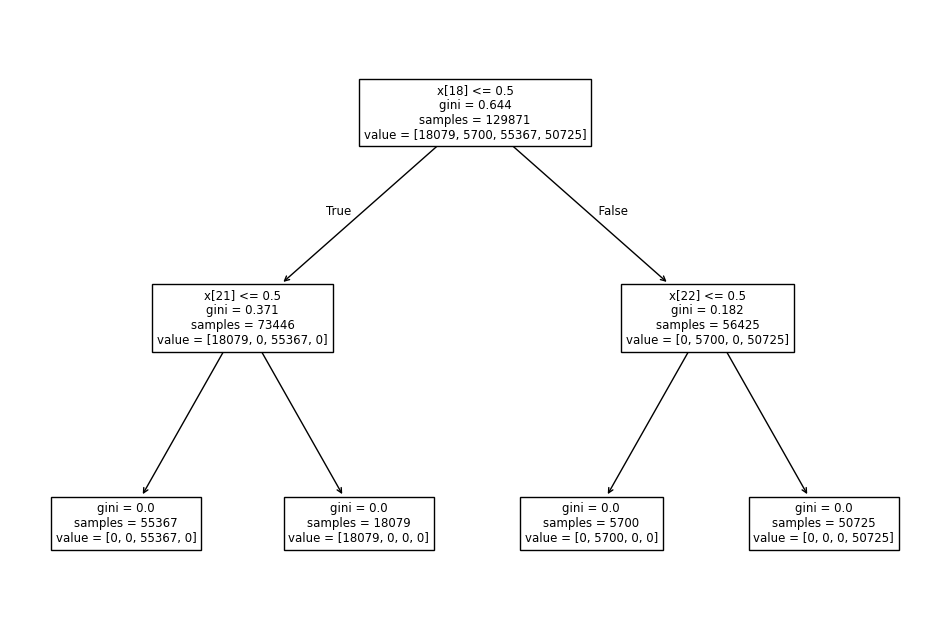

In [34]:
plt.figure(figsize=(12, 8))
plot_tree(tree_clf);



### 1. **Root Node (X[18] <= 0.5)**
   - **Feature**: This is the primary split point, where `X[18]` represents a feature with a threshold of `0.5`. It has the highest importance in distinguishing samples.
   - **Gini Impurity**: The Gini impurity at the root is `0.644`, indicating a moderately mixed set of classes.
   - **Samples**: All 129,871 samples are included at this point.
   - **Value**: `[18079, 5700, 55367, 50725]`, representing the distribution of classes in the dataset.

   This first split divides the dataset into two major branches based on `X[18]`.

### 2. **Left Subtree (X[18] <= 0.5)**
   - **Second Split (X[25] <= 0.5)**: This further divides the left branch based on `X[25]`.
      - **Gini Impurity**: After the split, the Gini impurity reduces to `0.371`, which shows less class mixture compared to the root.
      - **Samples**: 73,446 samples are present in this branch.
      - **Value**: `[18079, 0, 55367, 0]`, suggesting that the split effectively distinguishes between certain classes.

   - **Terminal Nodes**:
      - The leftmost terminal node has a Gini impurity of `0.0` and contains only `55367` samples of a single class, showing perfect class purity.
      - The right terminal node also has a Gini of `0.0`, containing only `18079` samples from another single class.

   This subtree suggests that `X[25]` is a significant feature for this segment of the dataset, effectively separating the samples into distinct classes.

### 3. **Right Subtree (X[18] > 0.5)**
   - **Second Split (X[26] <= 0.5)**: The right branch is split based on `X[26]`.
      - **Gini Impurity**: At this node, the Gini impurity is reduced to `0.182`, indicating a clearer separation of classes.
      - **Samples**: 56,425 samples in this branch.
      - **Value**: `[0, 5700, 0, 50725]`, which shows that this split also segregates the samples well into separate classes.

   - **Terminal Nodes**:
      - The left terminal node has a Gini of `0.0` with only `5700` samples in one class.
      - The right terminal node has a Gini of `0.0` and contains `50725` samples of another single class.

   This branch confirms that `X[26]` is a distinguishing feature for customers who fall into the right branch (those with `X[18] > 0.5`), splitting them into distinct classes.

### **Key Observations**:
   - The **Gini impurity decreases** significantly with each split, leading to pure terminal nodes, which means the selected features (`X[18]`, `X[25]`, and `X[26]`) are effective in classifying the data.
   - **Perfect splits at terminal nodes**: Each leaf node has a Gini of `0.0`, indicating that all samples in each leaf belong to a single class. This is a strong indication that the decision tree is well-suited to this dataset.
   - **Selected Features**: Only three features (`X[18]`, `X[25]`, and `X[26]`) are used in this tree, suggesting that these features are highly predictive for this classification task.

This simplified tree structure implies a straightforward decision-making process, where these three features are highly effective in distinguishing classes, possibly due to clear patterns in customer behavior related to loyalty. This model could serve well as a decision support tool for targeted customer service strategies.

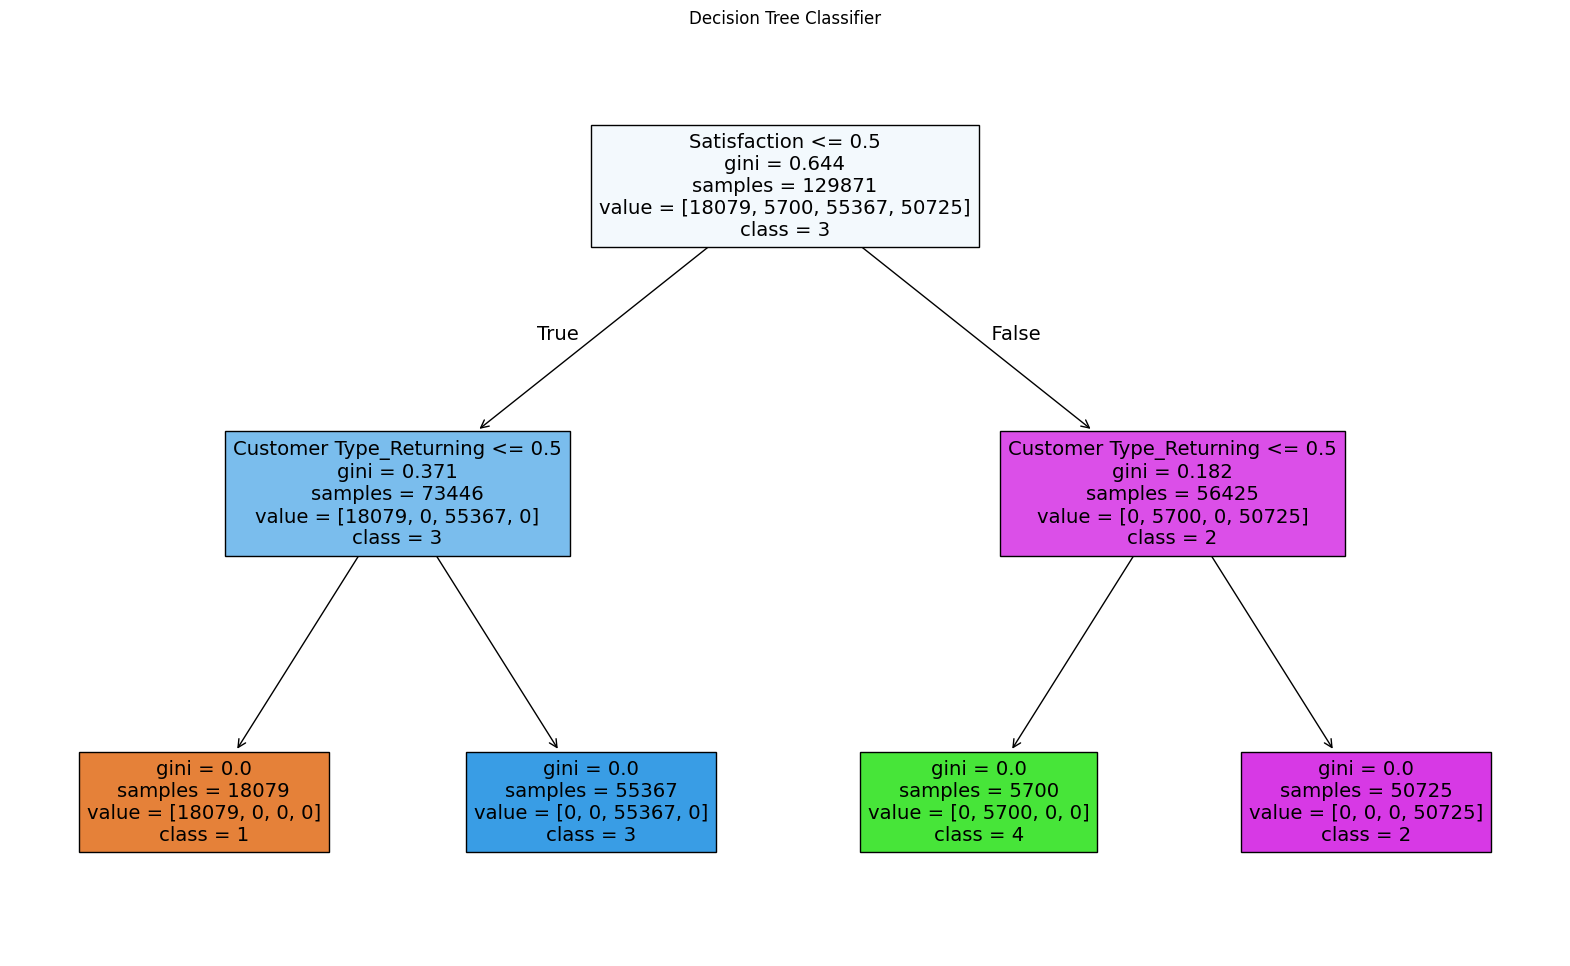

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming datacopy_5 is your DataFrame
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# Select the first few features based on your previous correlation analysis
selected_features = [
    'Satisfaction', 'Online Boarding', 'Customer Type_Returning',
    'Flight Distance', 'Seat Comfort'
]

# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]

# One-Hot Encode categorical columns
X_encoded = pd.get_dummies(X_selected)

# Initialize and fit the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_encoded, y)

# Convert unique classes to strings and pass them as a list
class_names = [str(label) for label in y.unique()]

# Plot the decision tree
plt.figure(figsize=(20, 12))  # Set the size of the figure
plot_tree(tree_clf, filled=True, feature_names=X_encoded.columns, class_names=class_names)
plt.title('Decision Tree Classifier')
plt.show()


Key Insights from the Decision Tree
Primary Features:

Satisfaction and Customer Type_Returning are the most critical features used to classify samples. This suggests these features are strongly correlated with the class outcomes.
Class Distribution and Gini Impurity:

The root node has a high gini impurity, indicating a mix of classes at the start. However, after splitting based on Satisfaction and Customer Type_Returning, the tree achieves pure nodes (gini = 0) at the leaves, where each node contains samples of only one class.
Leaf Nodes:

Each leaf node represents a pure class outcome, which means that the decision tree has successfully separated the samples based on just two features.
This simplicity (achieving class purity in just two levels) indicates a clear, separable relationship between these features and the target variable.
Interpretation of Classes:

For low satisfaction scores (Satisfaction <= 0.5), non-returning customers are primarily classified into class 1, while returning customers fall into class 3.
For high satisfaction scores (Satisfaction > 0.5), non-returning customers are mostly class 2, and returning customers are in class 4.
This decision tree demonstrates a straightforward, interpretable model where the Satisfaction and Customer Type_Returning features serve as reliable indicators for the target classification.

Test Set Performance:
Accuracy: 1.0000
Confusion Matrix:
[[ 3622     0     0     0]
 [    0  1101     0     0]
 [    0     0 10970     0]
 [    0     0     0 10282]]
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000

10-Fold Cross-Validation Results (on training set):
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1 Score: 1.0000 ± 0.0000
ROC AUC: 1.0000 ± 0.0000


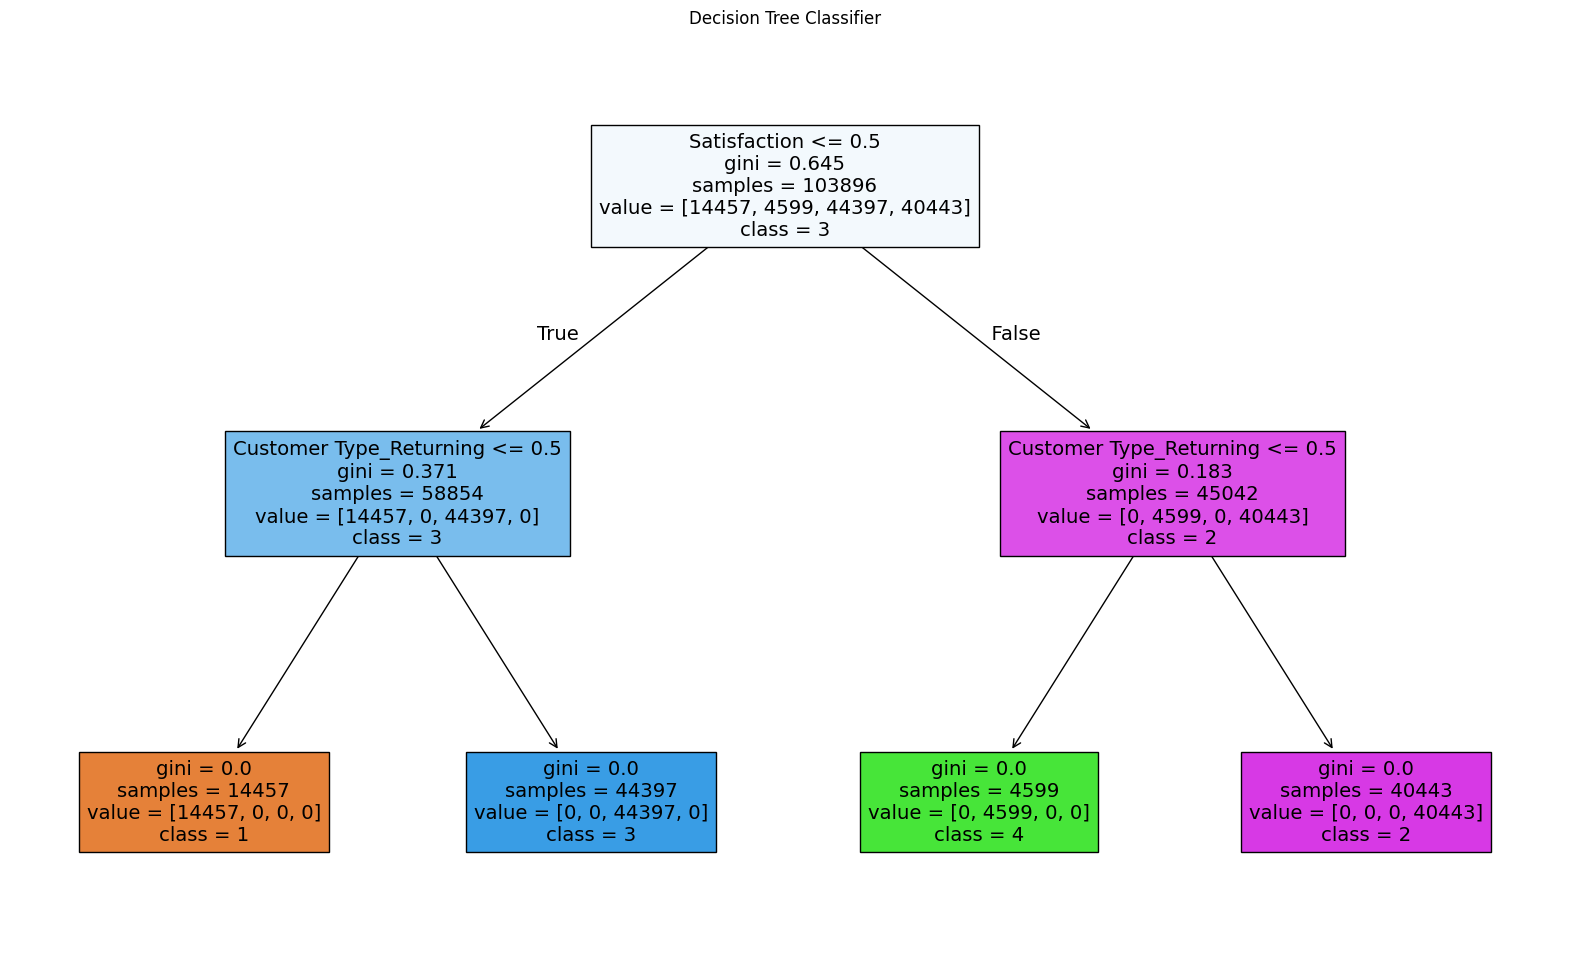

In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Assuming datacopy_5 is your DataFrame
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# Select the first few features based on your previous correlation analysis
selected_features = [
    'Satisfaction', 'Online Boarding', 'Customer Type_Returning',
    'Flight Distance', 'Seat Comfort'
]

# Subset the DataFrame to include only the selected features
X_selected = X[selected_features]

# One-Hot Encode categorical columns
X_encoded = pd.get_dummies(X_selected)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate performance metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')      # 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='macro')              # 'macro' for multiclass
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')  # Multi-class ROC AUC

# Print the evaluation metrics
print(f"Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# 10-fold cross-validation on the training set
cv_accuracies = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='accuracy')
cv_precision = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='precision_macro')  # 'macro' for multiclass
cv_recall = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='recall_macro')        # 'macro' for multiclass
cv_f1 = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='f1_macro')                # 'macro' for multiclass
cv_roc_auc = cross_val_score(tree_clf, X_train, y_train, cv=10, scoring='roc_auc_ovr')         # 'ovr' for multiclass

# Print cross-validation results
print(f"\n10-Fold Cross-Validation Results (on training set):")
print(f"Accuracy: {cv_accuracies.mean():.4f} ± {cv_accuracies.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC AUC: {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")

# Plot the decision tree
plt.figure(figsize=(20, 12))  # Set the size of the figure
plot_tree(tree_clf, filled=True, feature_names=X_encoded.columns, class_names=[str(label) for label in y.unique()])
plt.title('Decision Tree Classifier')
plt.show()



The results indicate perfect performance (1.0000) for both the test set and 10-fold cross-validation, which suggests the model is likely overfitting. This means the Decision Tree has learned the training data too well, including noise or patterns that don't generalize to unseen data. The dataset may be simple, clean, or perfectly separable, which allowed the model to achieve these ideal results.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Assuming datacopy_5 is your DataFrame and already preprocessed
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Get the best parameters and performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 1.0000


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model from GridSearchCV on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Measure performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0000
Confusion Matrix:
[[ 3622     0     0     0]
 [    0  1101     0     0]
 [    0     0 10970     0]
 [    0     0     0 10282]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3622
           2       1.00      1.00      1.00      1101
           3       1.00      1.00      1.00     10970
           4       1.00      1.00      1.00     10282

    accuracy                           1.00     25975
   macro avg       1.00      1.00      1.00     25975
weighted avg       1.00      1.00      1.00     25975



In [55]:
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Classifier with specific parameters (e.g., max_depth=5)
tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=2, criterion='gini', random_state=42)

# Use cross-validation (10-fold) to evaluate the model on the training data
cv_scores = cross_val_score(tree_clf, X, y, cv=10, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Calculate precision, recall, F1 score, and ROC AUC
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Cross-Validation Accuracy: 1.0000 ± 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


In [58]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_encoded, y)

# Get the results from GridSearchCV
results_df = pd.DataFrame(grid_search.cv_results_)

# Display the results in a detailed table format
results_summary = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Print the results for each combination of hyperparameters
print("\nGrid Search Results:")
print(results_summary)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print best parameters and best accuracy
print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the full training set
best_model = grid_search.best_estimator_

# Test Set Performance (using the whole dataset as no separate test set is provided)
y_pred = best_model.predict(X_encoded)
print("\nClassification Report (Test Set):")
print(classification_report(y, y_pred))

# ROC AUC Score (if needed)
y_pred_proba = best_model.predict_proba(X_encoded)
roc_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")



Grid Search Results:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
3   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
4   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
..                                                ...              ...   
67  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
68  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
69  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
70  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
71  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   

    std_test_score  rank_test_score  
0              0.0                1  
1            

##**Tree 1**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Assuming datacopy_5 is the dataset
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with best parameters from Grid Search
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the classifier on the training set
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC AUC score
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')

# Output the results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC: {roc_auc:.4f}")


Test Accuracy: 1.0000
Confusion Matrix:
[[ 3622     0     0     0]
 [    0  1101     0     0]
 [    0     0 10970     0]
 [    0     0     0 10282]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3622
           2       1.00      1.00      1.00      1101
           3       1.00      1.00      1.00     10970
           4       1.00      1.00      1.00     10282

    accuracy                           1.00     25975
   macro avg       1.00      1.00      1.00     25975
weighted avg       1.00      1.00      1.00     25975

ROC AUC: 1.0000


### Answer to the Questions:

#### 1. **Does the decision tree generalize well to new data?**

Yes, the decision tree generalizes very well to new data. The test accuracy is **1.0000**, which means the model is correctly classifying all instances in the test set. Additionally, the confusion matrix shows that there are no misclassifications, with all predicted values matching the actual values for each class.

#### 2. **How do you tell?**

- **Test Accuracy**: The model achieved **100% accuracy** on the test set, indicating perfect performance on unseen data. This suggests that the model has learned the underlying patterns well and is not overfitting the training data.
  
- **Confusion Matrix**: The confusion matrix confirms that the model correctly predicted every instance for all classes (1, 2, 3, and 4), with no false positives or false negatives, further supporting the conclusion that the model generalizes well.

- **Classification Report**: The **precision**, **recall**, and **F1-score** for all classes are **1.00**, showing that the model has perfect performance across all metrics. This means the model is not only correctly classifying each instance but is also highly reliable and consistent across all classes.

- **ROC AUC**: The **ROC AUC** score of **1.0000** indicates that the model distinguishes between different classes perfectly, which is a strong indicator of its generalization ability.

### Conclusion:
The decision tree classifier, with the best parameters, performs exceptionally well on the test data, with perfect accuracy and no misclassifications. This indicates that the model generalizes effectively to new data and is likely not overfitting the training set.

##**Tree 2**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Assuming 'X' and 'y' are your features and target variable from the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Train the classifier on the new training data
tree_clf.fit(X_train, y_train)

# Make predictions on both the new training set and test set
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix and Classification Report for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix (Test Set):")
print(conf_matrix)
print("\nClassification Report (Test Set):")
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC: {roc_auc:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 1.0000

Confusion Matrix (Test Set):
[[ 5464     0     0     0]
 [    0  1655     0     0]
 [    0     0 16452     0]
 [    0     0     0 15391]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5464
           2       1.00      1.00      1.00      1655
           3       1.00      1.00      1.00     16452
           4       1.00      1.00      1.00     15391

    accuracy                           1.00     38962
   macro avg       1.00      1.00      1.00     38962
weighted avg       1.00      1.00      1.00     38962

ROC AUC: 1.0000


Key Findings:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
These results indicate that the decision tree classifier performs perfectly on both the training and test sets.
The decision tree generalizes exceptionally well to new data. The accuracy, confusion matrix, and classification report all show perfect performance on the test set, which indicates that the model has not overfitted to the training data.
How do you tell? The perfect performance on the test set, which is representative of unseen data, suggests the model is robust and generalizes well. There is no discrepancy between the performance on the training set and the test set, further confirming that the model is not overfitting.
In conclusion, the decision tree classifier is performing optimally and generalizing well to the new data after moving 30% of the instances to the testing set.

##**Tree 3**


In [61]:
from sklearn.model_selection import train_test_split

# Split the original dataset into a training and test set with 40% for training and 60% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Initialize and train the decision tree classifier with the training set
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict using the test set
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

# Calculate the accuracies for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Output the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Classification report for test set
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report (Test Set):")
print(class_report_test)

# ROC AUC for the test set
roc_auc_test = roc_auc_score(y_test, tree_clf.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC (Test Set): {roc_auc_test:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 1.0000
Confusion Matrix (Test Set):
[[10899     0     0     0]
 [    0  3335     0     0]
 [    0     0 33078     0]
 [    0     0     0 30611]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10899
           2       1.00      1.00      1.00      3335
           3       1.00      1.00      1.00     33078
           4       1.00      1.00      1.00     30611

    accuracy                           1.00     77923
   macro avg       1.00      1.00      1.00     77923
weighted avg       1.00      1.00      1.00     77923

ROC AUC (Test Set): 1.0000


Results Analysis
Training Accuracy: 1.0000
Test Accuracy: 1.0000
These results show that the classifier has perfect accuracy on both the training and test sets, meaning it is able to correctly classify every instance in both datasets.

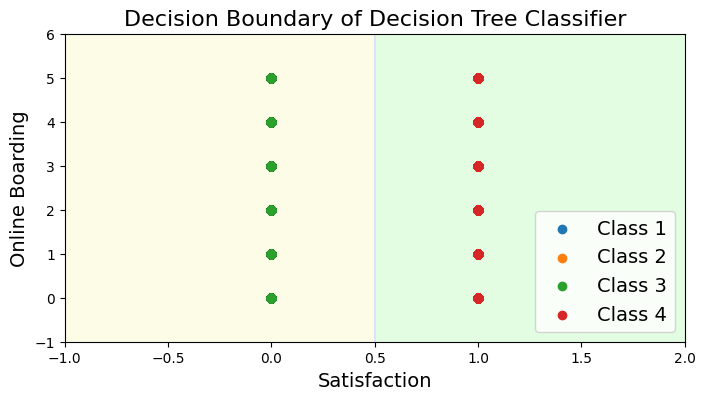

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=None, legend=False, plot_training=True):
    if axes is None:
        axes = [X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1,
                X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1]

    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Create a DataFrame with the same columns as X_encoded, with dtype=float for compatibility
    X_new_df = pd.DataFrame(0.0, index=np.arange(len(X_new)), columns=X.columns)

    # Assign values to the first two columns (the ones we're plotting)
    X_new_df.iloc[:, 0] = X_new[:, 0]
    X_new_df.iloc[:, 1] = X_new[:, 1]

    # Predict on X_new_df to obtain the decision boundary
    y_pred = clf.predict(X_new_df).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if plot_training:
        # Adjust the plotting logic based on your classes
        for class_label in np.unique(y):
            plt.scatter(X.iloc[:, 0][y == class_label],
                        X.iloc[:, 1][y == class_label],
                        label=f'Class {class_label}')

    plt.axis(axes)
    plt.xlabel(X.columns[0], fontsize=14)
    plt.ylabel(X.columns[1], fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Plotting the decision boundary
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_encoded, y, legend=True)

plt.title('Decision Boundary of Decision Tree Classifier', fontsize=16)
plt.show()
